In [9]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [10]:
n=100

In [11]:
x = torch.ones(n,2)    # second-col is just 1's 
x[:,0].uniform_(-1.,1) # create x-range across 0th col
x[:5]

# NOTES
# ..........
# tensors are just arrays : 1D, 2D, 3D, etc. ('rank') 

tensor([[-0.6238,  1.0000],
        [-0.4895,  1.0000],
        [ 0.2085,  1.0000],
        [ 0.9237,  1.0000],
        [-0.7778,  1.0000]])

In [12]:
a = tensor(3.,2); a   # param-tensor (theta)

tensor([3., 2.])

In [13]:
y = x@a + torch.rand(n)  # the random-const is theta-0

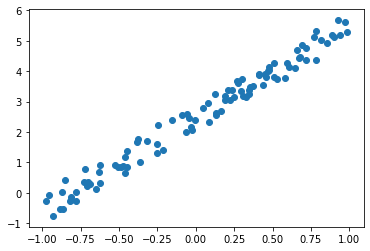

In [14]:
plt.scatter(x[:,0], y);

# NOTES
# .........
# this is artificial DATA which we will try to fit a model to

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [15]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

# NOTES
# .............
# y_hat = prediction
# y = real data

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [16]:
a = tensor(-1.,1)

In [20]:
y_hat = x@a
mse(y_hat, y)

tensor(7.9325, grad_fn=<MeanBackward0>)

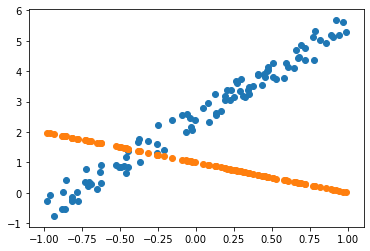

In [21]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [23]:
a = nn.Parameter(a); a
nn??

Type:        module
String form: <module 'torch.nn' from '/opt/anaconda3/lib/python3.7/site-packages/torch/nn/__init__.py'>
File:        /opt/anaconda3/lib/python3.7/site-packages/torch/nn/__init__.py
Source:     
from .modules import *  # noqa: F401
from .parameter import Parameter  # noqa: F401
from .parallel import DataParallel  # noqa: F401
from . import init  # noqa: F401
from . import utils  # noqa: F401


In [37]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward() # get GRAD and put into attribute 'a.grad'
    with torch.no_grad():
        a.sub_(lr * a.grad) # move towards local minima of COST FUNC: subtract by LR*GRAD 
        a.grad.zero_()

In [38]:
lr = 1e-1
for t in range(100): update()

tensor(0.0721, grad_fn=<MeanBackward0>)
tensor(0.0721, grad_fn=<MeanBackward0>)
tensor(0.0721, grad_fn=<MeanBackward0>)
tensor(0.0721, grad_fn=<MeanBackward0>)
tensor(0.0721, grad_fn=<MeanBackward0>)
tensor(0.0721, grad_fn=<MeanBackward0>)
tensor(0.0721, grad_fn=<MeanBackward0>)
tensor(0.0721, grad_fn=<MeanBackward0>)
tensor(0.0721, grad_fn=<MeanBackward0>)
tensor(0.0721, grad_fn=<MeanBackward0>)


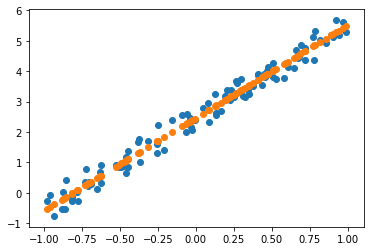

In [39]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [40]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [41]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

In [ ]:
# ^ meaning on datasets of MILLIONS of images, we train the model on one sub-batch of images, then the next and so on...
# "MINI BATCH"